# Weather Data Berlin

In [1]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

In [2]:
# Define the location - the coordinates for ALexanderplatz 
berlin = Point(52.5220, 13.4133)

# Define the time range
start_date = datetime.strptime('2015-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-12-31', '%Y-%m-%d')

# Fetch daily weather data
data = Daily(berlin, start_date, end_date)
data = data.fetch()

# Save specific columns to CSV
selected_columns = [
    'tavg',       # Average temperature
    'tmin',       # Daily minimum temperature
    'tmax',       # Daily maximum temperature
    'prcp',       # Precipitation
    'snow',       # Maximum snow depth
    'wspd',       # Average wind speed
    'wpgt',       # Peak wind gust
    'pres',       # Average sea-level pressure
    'tsun',       # Sunshine duration
    'wdir'        # Wind direction
]


In [3]:
# Ensure selected columns exist in the data
data = data[selected_columns]

In [4]:
# Export to CSV
data.to_csv('berlin_weather_data.csv')
print("Data saved to 'berlin_weather_data.csv'")

Data saved to 'berlin_weather_data.csv'


## Exploratory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Let's load the dataset
file_path = 'berlin_weather_data.csv'
data = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Let's preview the dataset
print(data.head())
print(data.tail())

            tavg  tmin  tmax  prcp  snow  wspd  wpgt    pres   tsun   wdir
time                                                                      
2015-01-01   3.9   2.3   6.0   0.0   0.0  16.9  36.4  1031.3  288.0  253.0
2015-01-02   5.4   3.0   8.2   1.2   0.0  24.8  59.8  1019.3   24.0  237.0
2015-01-03   4.8   3.4   5.9   0.3   0.0  26.6  64.8  1017.6    0.0  258.0
2015-01-04   3.6   1.6   5.0   0.8   0.0  28.1  61.9  1022.2  102.0  295.0
2015-01-05   3.4   2.1   4.0   2.5   0.0  20.5  50.0  1027.3    0.0  295.0
            tavg  tmin  tmax  prcp  snow  wspd  wpgt    pres   tsun   wdir
time                                                                      
2023-12-27   4.3   2.9   5.5   0.1   0.0  13.7  37.1  1019.7  324.0  216.0
2023-12-28   8.6   4.1  10.7   0.0   0.0  17.6  47.2  1011.7  198.0  212.0
2023-12-29   9.7   7.3  11.4   3.8   0.0  20.9  57.2  1007.1   42.0  225.0
2023-12-30   6.7   4.8   8.1   0.0   0.0  14.8  45.4  1010.8    6.0  235.0
2023-12-31   6.3   3.9   

In [7]:
# Now let's check for the missing values
missing_values = data.isnull().sum
print("Missing values:\n", missing_values)

Missing values:
 <bound method DataFrame.sum of              tavg   tmin   tmax   prcp   snow   wspd   wpgt   pres   tsun  \
time                                                                        
2015-01-01  False  False  False  False  False  False  False  False  False   
2015-01-02  False  False  False  False  False  False  False  False  False   
2015-01-03  False  False  False  False  False  False  False  False  False   
2015-01-04  False  False  False  False  False  False  False  False  False   
2015-01-05  False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-27  False  False  False  False  False  False  False  False  False   
2023-12-28  False  False  False  False  False  False  False  False  False   
2023-12-29  False  False  False  False  False  False  False  False  False   
2023-12-30  False  False  False  False  False  False  False  False  False   
2023-12-31  False  False  Fa

In [8]:
# Let's quickly check the statistical summary of the variables
print(data.describe())

              tavg         tmin         tmax         prcp         snow  \
count  3287.000000  3287.000000  3287.000000  3287.000000  3287.000000   
mean     11.313143     7.047977    15.521844     1.486036     1.399452   
std       7.594656     6.571284     8.977583     4.039742     9.500016   
min      -9.800000   -12.800000    -7.700000     0.000000     0.000000   
25%       5.300000     2.000000     8.200000     0.000000     0.000000   
50%      10.800000     6.700000    15.100000     0.000000     0.000000   
75%      17.600000    12.400000    22.800000     1.200000     0.000000   
max      30.100000    23.900000    38.500000   112.800000   160.000000   

              wspd         wpgt         pres         tsun         wdir  
count  3287.000000  3276.000000  3287.000000  3287.000000  3287.000000  
mean     12.975844    37.192796  1016.123547   301.428963   200.137816  
std       4.926411    13.013054     9.173226   270.642458    88.875066  
min       3.200000    11.500000   974.700

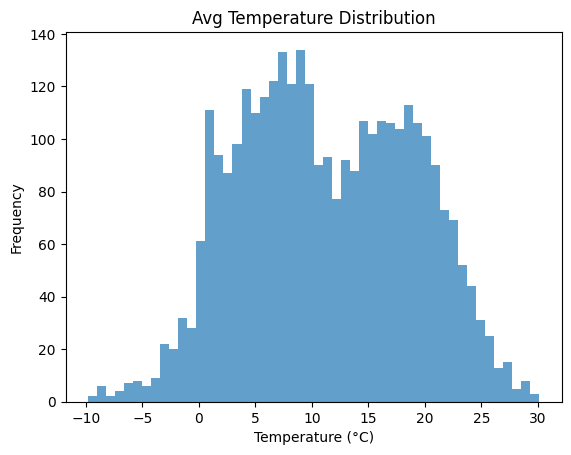

In [9]:
# Now let's check the distribution of the teperature
data['tavg'].plot(kind='hist', bins=50, alpha=0.7, title='Avg Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

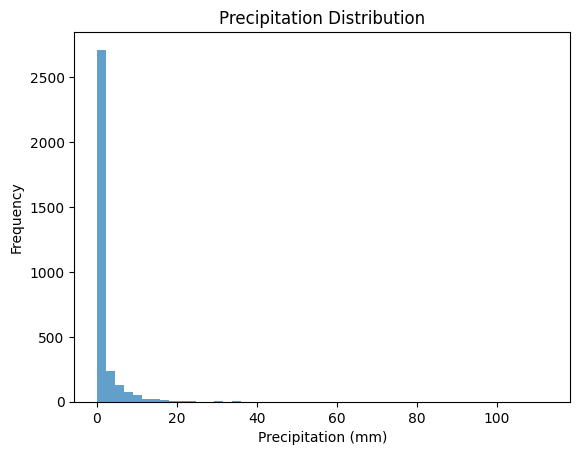

In [10]:
# Similarly let's check the distribution of the precipitation
data['prcp'].plot(kind='hist', bins=50, alpha=0.7, title='Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.show()

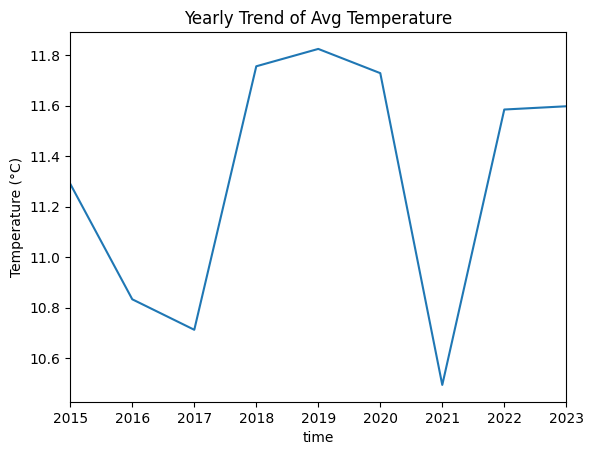

In [11]:
# Now let's check the yearly trend of the avergae temperature
data['tavg'].resample('YE').mean().plot(title='Yearly Trend of Avg Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

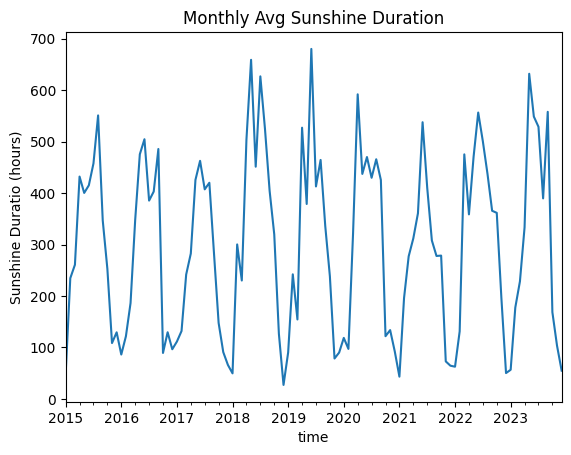

In [12]:
# Now let's check the monthly average sunshine duration
# let's group by month to analyse seasonality
monthly_sunshine = data['tsun'].resample('ME').mean()
monthly_sunshine.plot(title='Monthly Avg Sunshine Duration')
plt.ylabel('Sunshine Duratio (hours)')
plt.show()

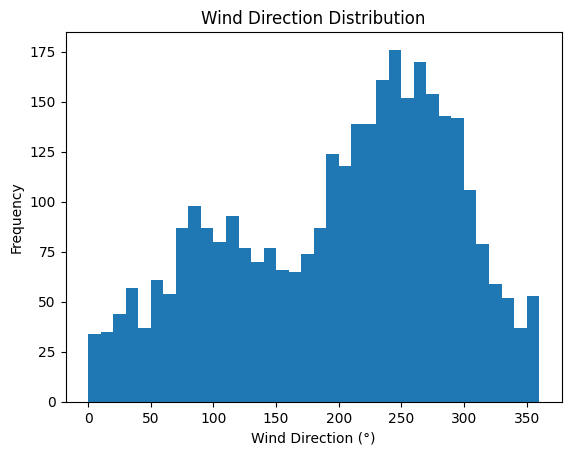

In [13]:
# Let's check the distribution of the wind direction
data['wdir'].plot(kind='hist', bins=36, title='Wind Direction Distribution')
plt.xlabel('Wind Direction (°)')
plt.show()